Sampling directly from the standard normal distribution is not trivial, since its inverse CDF has no closed-form.  
Here we implement and uses the Box-Muller transform, which generates normal samples from uniform random variables.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
n_samples = 10_000


\begin{align}
V_1, V_2 &\sim \text{Uniform}(-1, 1)\\
R^2 &= V_1^2 + V_2^2\\
\text{Accept if } R &< 1, \text{ otherwise reject}\\
\end{align}


In [3]:
def generate_relevant_pairs(n:int, return_r_square:bool=True) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    x_min, x_max = -1, 1
    u1, u2 = np.random.uniform(x_min, x_max, n), np.random.uniform(x_min, x_max, n)
    r_square = u1**2 + u2**2
    mask = r_square <= 1
    
    if return_r_square:
        return u1[mask], u2[mask], r_square[mask]
    
    return u1[mask], u2[mask]

\begin{align*}
Z_1 = V_1 \sqrt{\frac{-2\ln(R)}{R}},& \quad Z_2 = V_2 \sqrt{\frac{-2\ln(R)}{R}} 
\end{align*}


In [4]:
def transform_to_normal(x: np.ndarray, r_square: np.ndarray) -> np.ndarray:
    return x * np.sqrt(-2*np.log(r_square)/r_square)

In [5]:
def box_muller_sampling(n: int) -> np.ndarray:
    u1, u2, r_square = generate_relevant_pairs(n)
    z1, z2 = transform_to_normal(u1, r_square), transform_to_normal(u2, r_square)
    z = np.hstack([z1, z2])
    return z[:n]

In [6]:
z = box_muller_sampling(n_samples)

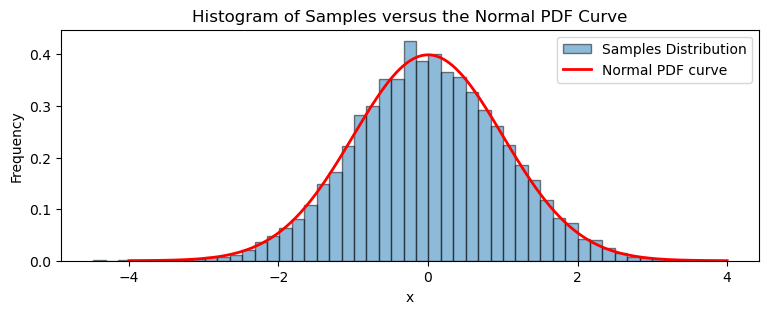

In [7]:
# Plot histogram 
plt.figure(figsize=(9, 3))
plt.hist(z, bins=50, density=True, alpha=0.5, label='Samples Distribution', edgecolor='black')


# Scale the PDF to match histogram scale
x_vals = np.linspace(-4, 4, 500)
pdf_vals = st.norm.pdf(x_vals)

# Plot the scaled PDF curve
plt.plot(x_vals, pdf_vals, 'r-', label='Normal PDF curve', linewidth=2)

plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of Samples versus the Normal PDF Curve')
plt.legend()
plt.show()